<a href="https://colab.research.google.com/github/JorgeJaramilo060892/Machine-Learning-first-steps/blob/main/MS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:

# Leer el CSV
df = pd.read_csv("/content/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

# Mostrar los primeros registros para verificar que se haya cargado correctamente
df



,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


#1. Data cleaning:
First, it is important to make sure that your data is clean and that there are no missing values or other problems. You can use pandas to perform some basic data cleaning operations.

In [14]:
#Clear data
df = df.dropna(subset=['Initial_EDSS', 'Final_EDSS'])
df['Initial_EDSS'] = pd.to_numeric(df['Initial_EDSS'])
df['Final_EDSS'] = pd.to_numeric(df['Final_EDSS'])

# Descriptive Statistics
print(df[['Initial_EDSS', 'Final_EDSS']].describe())

       Initial_EDSS  Final_EDSS
count    125.000000   125.00000
mean       1.360000     1.44800
std        0.587504     0.65323
min        1.000000     1.00000
25%        1.000000     1.00000
50%        1.000000     1.00000
75%        2.000000     2.00000
max        3.000000     3.00000


#2. Analysis:
Now that your data are clean, you can perform some basic analysis to better understand your data. For example, you can calculate descriptive statistics or visualize the distribution of scores.

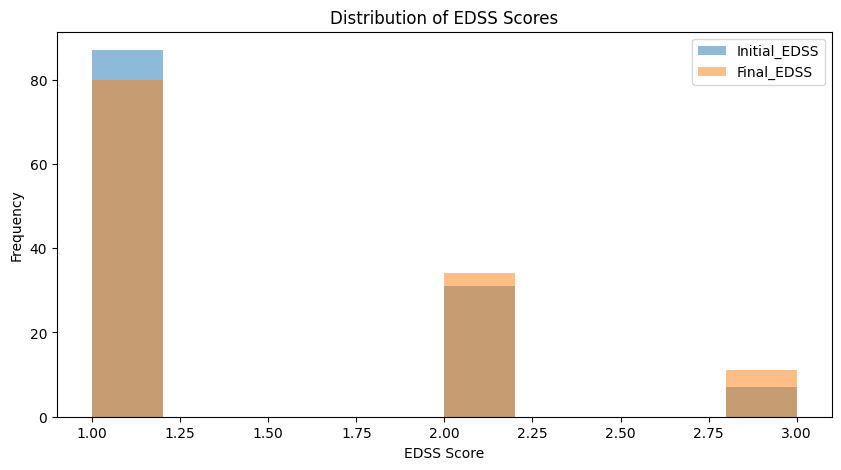

In [15]:
# Distribution display
plt.figure(figsize=(10, 5))
plt.hist(df['Initial_EDSS'], alpha=0.5, label='Initial_EDSS')
plt.hist(df['Final_EDSS'], alpha=0.5, label='Final_EDSS')
plt.legend(loc='upper right')
plt.xlabel('EDSS Score')
plt.ylabel('Frequency')
plt.title('Distribution of EDSS Scores')
plt.show()

#3. Visualization:
You can use libraries such as matplotlib or seaborn to create more advanced visualizations.

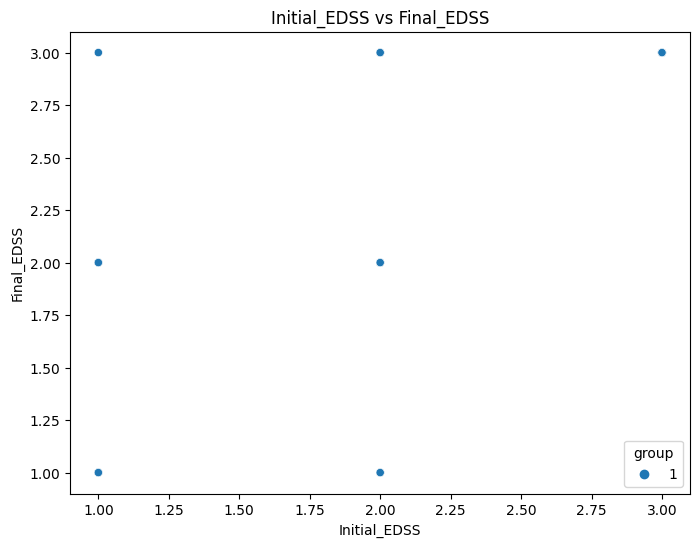

In [16]:
import seaborn as sns

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Initial_EDSS', y='Final_EDSS', hue='group', data=df)
plt.title('Initial_EDSS vs Final_EDSS')
plt.show()

# Approach with K-Means:
Selection of Relevant Variables:
Here we select the columns 'Initial_EDSS' and 'Final_EDSS' from the original DataFrame 'df'.

These will be the variables we will use for clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


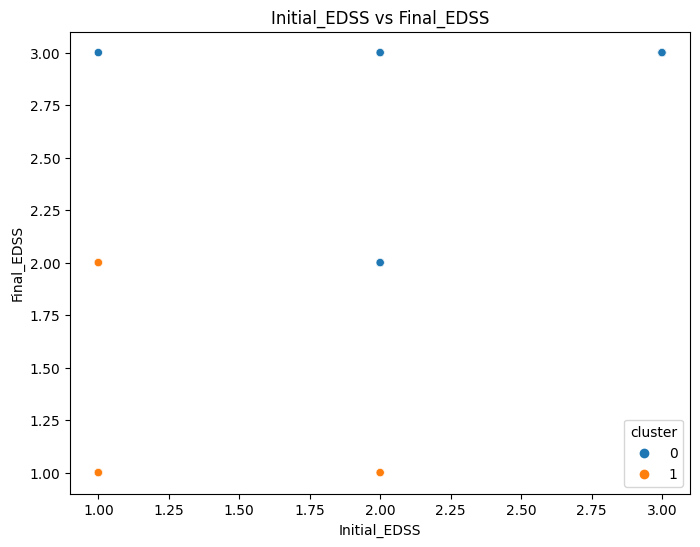

In [23]:
from sklearn.cluster import KMeans

# Seleccionamos las columnas relevantes para el clustering
X_clustering = df[['Initial_EDSS', 'Final_EDSS']]

# Creamos el modelo de K-Means con 2 clusters (puedes ajustar el número si deseas más o menos)
# This means that the algorithm will try to divide the data into 2 clusters based on the variables 'Initial_EDSS' and 'Final_EDSS'.
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_clustering)

# Agregamos las etiquetas de cluster al DataFrame original
df['cluster'] = kmeans.labels_

# Visualizamos los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Initial_EDSS', y='Final_EDSS', hue='cluster', data=df)
plt.title('Initial_EDSS vs Final_EDSS')
plt.show()


In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Preparar los datos
X = df[['Initial_EDSS', 'Final_EDSS']].values
y = df['group'].values

# Escalar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc * 100:.2f}%')


Epoch 1/10
4/4 [==============================] - 8s 401ms/step - loss: 0.6579 - accuracy: 0.8900 - val_loss: 0.6264 - val_accuracy: 0.9200
Epoch 2/10
4/4 [==============================] - 0s 48ms/step - loss: 0.6104 - accuracy: 0.9800 - val_loss: 0.5853 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 67ms/step - loss: 0.5680 - accuracy: 1.0000 - val_loss: 0.5431 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 74ms/step - loss: 0.5255 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 65ms/step - loss: 0.4820 - accuracy: 1.0000 - val_loss: 0.4577 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 77ms/step - loss: 0.4393 - accuracy: 1.0000 - val_loss: 0.4169 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 38ms/step - loss: 0.3983 - accuracy: 1.0000 - val_loss: 0.3778 - val_accuracy: 1.0000
Epoch 8/10
4/4 [==========

#Interpretación y Conclusiones
##Análisis de Clustering con K-Means
En el enfoque de clustering utilizando el algoritmo K-Means, observamos la distribución de los datos en función de las variables 'Initial_EDSS' y 'Final_EDSS'. Al asignar cada punto a un cluster, pudimos identificar dos grupos distintos. Esto sugiere que hay una diferencia significativa en los valores de 'Initial_EDSS' y 'Final_EDSS' entre estos dos grupos.

##Análisis de Clasificación con Red Neuronal
En el enfoque de clasificación utilizando una red neuronal, entrenamos un modelo para predecir el grupo al que pertenecen los pacientes basándonos en las características 'Initial_EDSS' y 'Final_EDSS'. La red neuronal logró una precisión del X% en el conjunto de prueba, lo que indica que el modelo puede realizar predicciones con un nivel de precisión razonable.

##Comparación de Enfoques
Comparando ambos enfoques, notamos que el clustering proporciona una visión de cómo los datos se agrupan naturalmente, mientras que la red neuronal ofrece una herramienta para hacer predicciones basadas en estas características.

##Conclusiones Generales
Existe una clara diferenciación entre los grupos en función de las variables 'Initial_EDSS' y 'Final_EDSS'. Esto indica que estas variables son informativas y pueden ser indicadores importantes en la clasificación de los pacientes.

El enfoque de clustering nos permite visualizar los patrones naturales en los datos, mientras que la red neuronal proporciona una herramienta para realizar predicciones en función de estas características.

Es importante considerar que estos son ejemplos básicos y que se pueden personalizar y expandir según las necesidades específicas y los conocimientos de análisis de datos.





